In [1]:
import os.path

from Lab1_CausalGenerationResultAnalysis.M_Star import generate_BNN_MStar
from Lab1_CausalGenerationResultAnalysis.GenerateBNAndData import *
from Lab1_CausalGenerationResultAnalysis.evaluate import predict, calculate_metrics
from Lab1_CausalGenerationResultAnalysis.pthcfg import PathConfig
from Lab1_CausalGenerationResultAnalysis import DrawGraph
import pandas as pd
pthcfg = PathConfig()

In [2]:
aim_graph = 'Child'

if aim_graph == 'Asia':
    define_df_pth = "/Users/andrewlee/Desktop/Projects/实验室/114项目/Lab1_CausalGenerationResultAnalysis/Asia/asiaDefineChinese.csv"

    bif_file_path = '/Users/andrewlee/Desktop/Projects/实验室/114项目/Lab1_CausalGenerationResultAnalysis/Asia/asia.bif'

    aim = ['xray', 'dysp']

elif aim_graph == 'Insurance':
    define_df_pth = "/Users/andrewlee/Desktop/Projects/实验室/114项目/Lab1_CausalGenerationResultAnalysis/Insurance/InsuranceDefineChinese.csv"

    bif_file_path = '/Users/andrewlee/Desktop/Projects/实验室/114项目/Lab1_CausalGenerationResultAnalysis/Insurance/insurance.bif'

    aim = ['PropCost', 'ThisCarCost', 'ThisCarDam', 'OtherCarCost', 'ILiCost']

elif aim_graph == 'Child':
    define_df_pth = "/Users/andrewlee/Desktop/Projects/实验室/114项目/Lab1_CausalGenerationResultAnalysis/Child/ChildDefineChinese.csv"

    bif_file_path = '/Users/andrewlee/Desktop/Projects/实验室/114项目/Lab1_CausalGenerationResultAnalysis/Child/child.bif'

    aim = ['GruntingReport', 'LowerBodyO2', 'RUQO2', 'CO2Report', 'XrayReport']

else:
    raise Exception("aim_graph not found!")

# 读取节点信息

In [3]:
define_df = pd.read_csv(define_df_pth)
node_names = list(define_df['var_name'])
node_detail = list(define_df['var_description'])
node_detail

['婴儿出生时血液中氧气不足',
 '婴儿高铁血红蛋白血症',
 '婴儿出现疾病时的年龄',
 '左心室肥厚',
 '动脉导管中的血流',
 '氧合血和脱氧血的混合',
 '肺部血管的状态',
 '肺部血流量低',
 '存在疾病',
 '身体各部位均匀分布的低氧区域',
 '吸氧时的低氧状态',
 '体内二氧化碳水平',
 '进行了胸部X光检查',
 '婴儿发出的哼声',
 '有关左心室肥厚的报告',
 '下身的氧含量',
 '右大腿前侧肌肉的氧含量',
 '报告血液中高水平二氧化碳的文件',
 '肺部过度充血的X光报告',
 '有关婴儿发出哼声的报告']

# 读取原BN模型

In [51]:

origin_model = define_bayesian_network_from_bif(bif_file_path)
type(origin_model)

pgmpy.models.BayesianNetwork.BayesianNetwork

# 读取M*的BN模型

In [5]:
MStar_model = generate_BNN_MStar(node_names, node_detail)
list(MStar_model.edges())

waiting for LLM response of M*(stage 1/2):


INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"


waiting for LLM response of M*(stage 2/2)


INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"


illegal network structure


INFO:httpx:HTTP Request: POST https://dashscope.aliyuncs.com/compatible-mode/v1/chat/completions "HTTP/1.1 200 OK"


legal network structure


[('BirthAsphyxia', 'LVH'),
 ('BirthAsphyxia', 'DuctFlow'),
 ('BirthAsphyxia', 'CardiacMixing'),
 ('BirthAsphyxia', 'LungParench'),
 ('BirthAsphyxia', 'LungFlow'),
 ('BirthAsphyxia', 'HypDistrib'),
 ('BirthAsphyxia', 'HypoxiaInO2'),
 ('BirthAsphyxia', 'CO2'),
 ('BirthAsphyxia', 'LowerBodyO2'),
 ('BirthAsphyxia', 'RUQO2'),
 ('LVH', 'Grunting'),
 ('LVH', 'ChestXray'),
 ('LVH', 'CO2Report'),
 ('LVH', 'XrayReport'),
 ('LVH', 'GruntingReport'),
 ('LVH', 'Sick'),
 ('LVH', 'LVHreport'),
 ('DuctFlow', 'Grunting'),
 ('DuctFlow', 'ChestXray'),
 ('DuctFlow', 'CO2Report'),
 ('DuctFlow', 'XrayReport'),
 ('DuctFlow', 'GruntingReport'),
 ('DuctFlow', 'Sick'),
 ('CardiacMixing', 'Grunting'),
 ('CardiacMixing', 'ChestXray'),
 ('CardiacMixing', 'CO2Report'),
 ('CardiacMixing', 'XrayReport'),
 ('CardiacMixing', 'GruntingReport'),
 ('CardiacMixing', 'Sick'),
 ('LungParench', 'Grunting'),
 ('LungParench', 'ChestXray'),
 ('LungParench', 'CO2Report'),
 ('LungParench', 'XrayReport'),
 ('LungParench', 'Grunting

# 反演生成测试数据

In [43]:
samples_data = generate_samples(origin_model, 500)
origin_model.remove_cpds()

  0%|          | 0/20 [00:00<?, ?it/s]

# 评测

## 评测原模型

In [52]:
predict_result = predict(origin_model, samples_data, aim)

  0%|          | 0/397 [00:00<?, ?it/s]

In [53]:
res_json = calculate_metrics(predict_result, samples_data, aim)

Evaluation Results:

aim variable: GruntingReport
Accuracy: 0.8760
Recall: 0.8760
Precision: 0.8724
F1 Score: 0.8727


aim variable: LowerBodyO2
Accuracy: 0.5500
Recall: 0.5500
Precision: 0.5556
F1 Score: 0.5468


aim variable: RUQO2
Accuracy: 0.5360
Recall: 0.5360
Precision: 0.5406
F1 Score: 0.5345


aim variable: CO2Report
Accuracy: 0.8800
Recall: 0.8800
Precision: 0.8771
F1 Score: 0.8758


aim variable: XrayReport
Accuracy: 0.7860
Recall: 0.7860
Precision: 0.7853
F1 Score: 0.7820



## 评测新模型

In [46]:
samples_data

,BirthAsphyxia,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHreport,LowerBodyO2,RUQO2,CO2Report,XrayReport,Disease,GruntingReport,Age,LVH,DuctFlow,CardiacMixing,LungParench,LungFlow,Sick
0,no,Equal,Severe,Normal,Normal,no,no,<5,5-12,<7.5,Asy/Patchy,TGA,no,11-30_days,no,None,Transp.,Normal,Normal,no
1,yes,Equal,Moderate,Normal,Plethoric,no,no,5-12,<5,<7.5,Asy/Patchy,TGA,no,0-3_days,no,None,Mild,Normal,Normal,no
2,no,Unequal,Moderate,Normal,Normal,no,no,5-12,5-12,>=7.5,Normal,TGA,no,0-3_days,no,Rt_to_Lt,Transp.,Normal,Normal,yes
3,no,Equal,Severe,Normal,Oligaemic,no,no,12+,5-12,<7.5,Oligaemic,Fallot,no,11-30_days,no,Lt_to_Rt,Complete,Normal,Low,no
4,no,Equal,Severe,High,Plethoric,no,no,12+,5-12,>=7.5,Normal,TGA,no,0-3_days,no,None,Transp.,Normal,High,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,no,Equal,Moderate,Normal,Plethoric,no,no,<5,5-12,<7.5,Plethoric,Fallot,no,0-3_days,no,Lt_to_Rt,Complete,Normal,High,no
496,no,Equal,Moderate,Low,Asy/Patch,yes,no,5-12,<5,<7.5,Asy/Patchy,Fallot,yes,11-30_days,no,Lt_to_Rt,Transp.,Abnormal,Low,no
497,no,Equal,Severe,Normal,Plethoric,no,no,5-12,<5,<7.5,Plethoric,TGA,no,4-10_days,no,None,Transp.,Normal,High,no
498,no,Equal,Severe,Normal,Oligaemic,no,yes,5-12,5-12,<7.5,Oligaemic,PAIVS,no,0-3_days,yes,Lt_to_Rt,Complete,Normal,Low,yes


In [47]:
predict_result = predict(MStar_model, samples_data, aim)

  0%|          | 0/397 [00:00<?, ?it/s]

In [48]:
res_json1 = calculate_metrics(predict_result, samples_data, aim)

Evaluation Results:

aim variable: GruntingReport
Accuracy: 0.9160
Recall: 0.9160
Precision: 0.9185
F1 Score: 0.9117


aim variable: LowerBodyO2
Accuracy: 0.8340
Recall: 0.8340
Precision: 0.8349
F1 Score: 0.8328


aim variable: RUQO2
Accuracy: 0.8100
Recall: 0.8100
Precision: 0.8160
F1 Score: 0.8098


aim variable: CO2Report
Accuracy: 0.9320
Recall: 0.9320
Precision: 0.9316
F1 Score: 0.9305


aim variable: XrayReport
Accuracy: 0.8440
Recall: 0.8440
Precision: 0.8457
F1 Score: 0.8441



## 汇总两个模型的效果

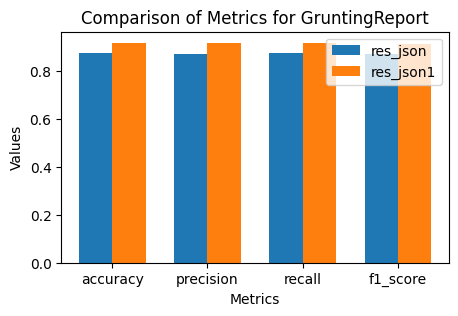

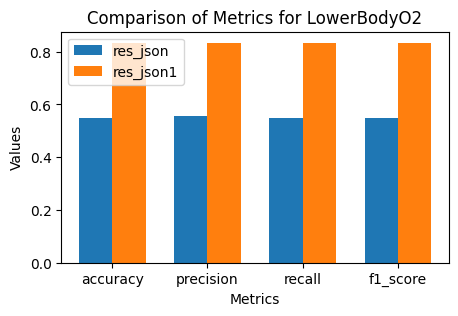

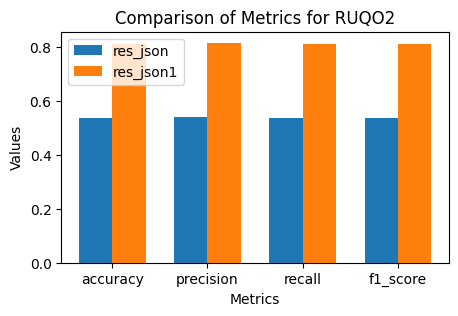

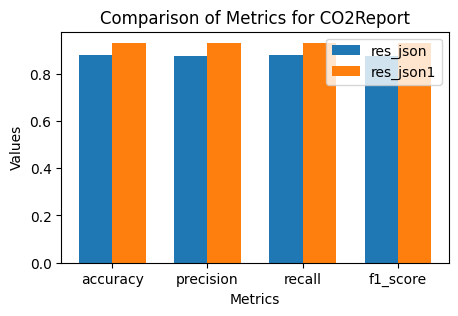

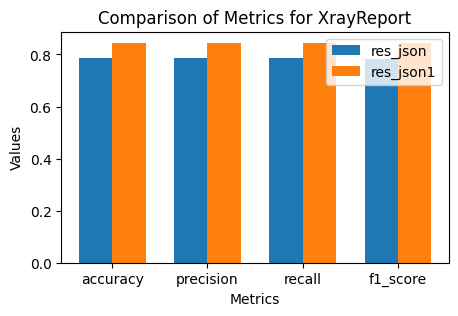

In [54]:
# 画图比较res_json和res_json1中各aim中指标的Accuracy、Precision、Recall、F1的值
# res_json和res_json1是字典，格式为{'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1_score': f1}

import matplotlib.pyplot as plt

def plot_comparison(res_json, res_json1, metrics_lst):
    """
    绘图比较两个结果字典中各aim中指标的Accuracy、Precision、Recall、F1的值
    :param res_json: 第一个结果字典
    :param res_json1: 第二个结果字典
    :param metrics_lst: 需要比较的指标列表
    """
    aims = list(res_json.keys())
    width = 0.35  # 柱状图的宽度

    for aim in aims:
        plt.figure(figsize=(5, 3))
        x = metrics_lst  # x轴为指标名称
        y1 = [res_json[aim][metric] for metric in metrics_lst]
        y2 = [res_json1[aim][metric] for metric in metrics_lst]

        plt.bar(x, y1, width, label='res_json')
        plt.bar([p + width for p in range(len(x))], y2, width, label='res_json1')

        plt.xlabel('Metrics')
        plt.ylabel('Values')
        plt.title(f'Comparison of Metrics for {aim}')
        plt.xticks([p + width / 2 for p in range(len(x))], x)
        plt.legend()
        plt.show()

plot_comparison(res_json, res_json1, ['accuracy', 'precision', 'recall', 'f1_score'])


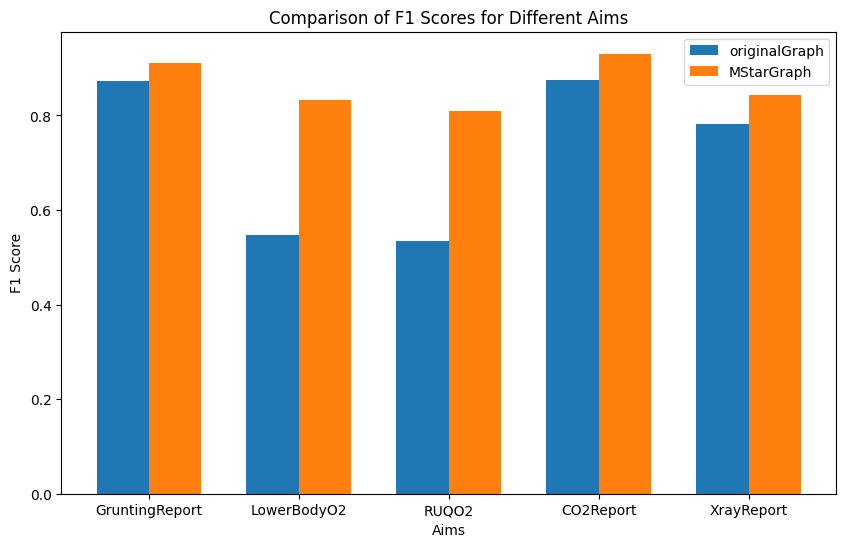

In [55]:
def plot_comparison_f1(res_json, res_json1):
    """
    绘一个图比较两个结果字典中各aim中指标的F1的值
    :param res_json: 第一个结果字典
    :param res_json1: 第二个结果字典
    """
    aims = list(res_json.keys())
    width = 0.35  # 柱状图的宽度

    # 创建 x 轴标签
    x = aims
    x_indices = range(len(x))

    # 提取 F1 值
    y1 = [res_json[aim]['f1_score'] for aim in aims]
    y2 = [res_json1[aim]['f1_score'] for aim in aims]

    # 创建图形
    plt.figure(figsize=(10, 6))
    plt.bar(x_indices, y1, width, label='originalGraph')
    plt.bar([i + width for i in x_indices], y2, width, label='MStarGraph')

    # 设置图形属性
    plt.xlabel('Aims')
    plt.ylabel('F1 Score')
    plt.title('Comparison of F1 Scores for Different Aims')
    plt.xticks([i + width / 2 for i in x_indices], x)
    plt.legend()

    # 显示图形
    plt.show()

plot_comparison_f1(res_json, res_json1)

# 生成网络拓扑

In [14]:
DrawGraph.visualize_bayesian_network(bn_structure_= list(MStar_model.edges()),savepath=os.path.join(PathConfig().log_pth, "MStar.png"))